In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and Target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:\nMSE: {mse:.4f}\nR2 Score: {r2:.4f}")
    
    # Plotting
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()


Linear Regression:
MSE: 0.0650
R2 Score: 0.3539


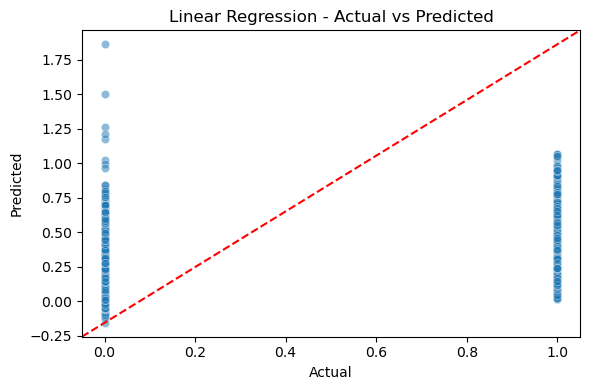

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, "Linear Regression")


Decision Tree Regressor:
MSE: 0.1128
R2 Score: -0.1208


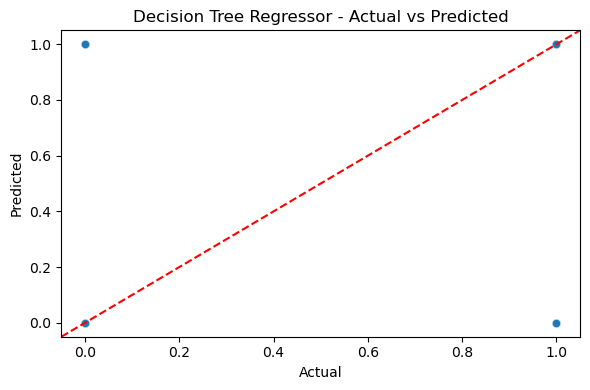

In [6]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree Regressor")


Random Forest Regressor:
MSE: 0.0592
R2 Score: 0.4111


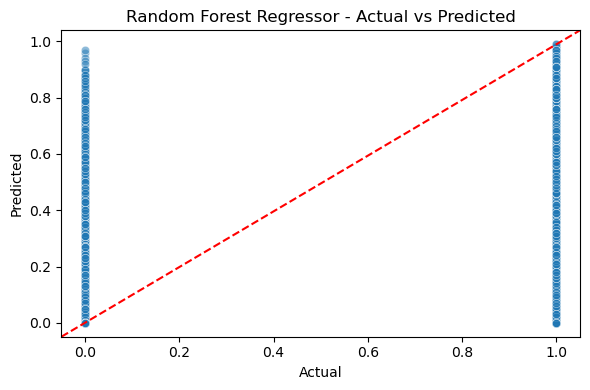

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest Regressor")


Gradient Boosting Regressor:
MSE: 0.0566
R2 Score: 0.4374


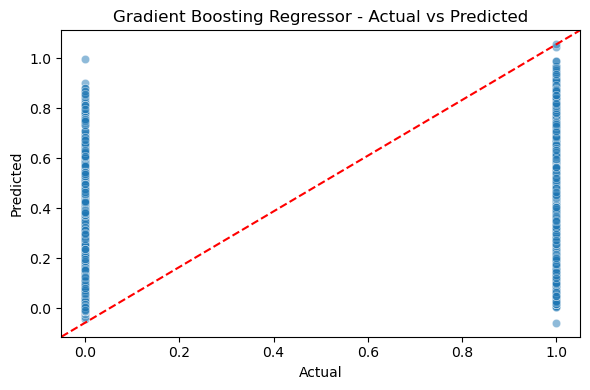

In [8]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
evaluate_model(gb, "Gradient Boosting Regressor")


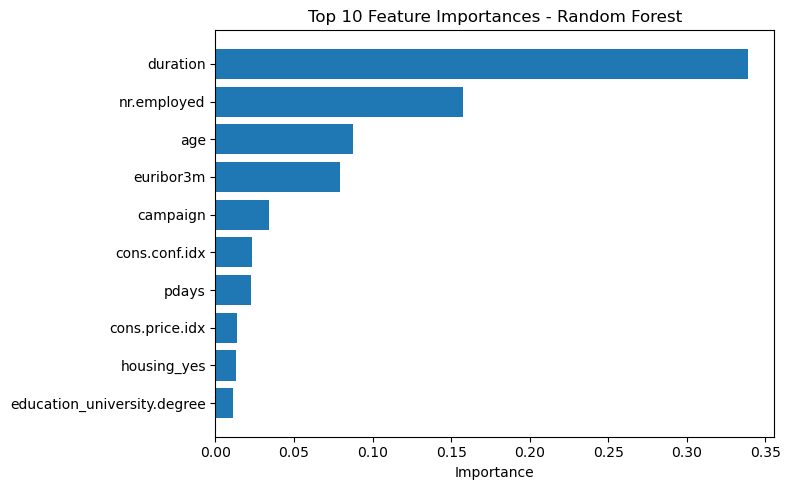

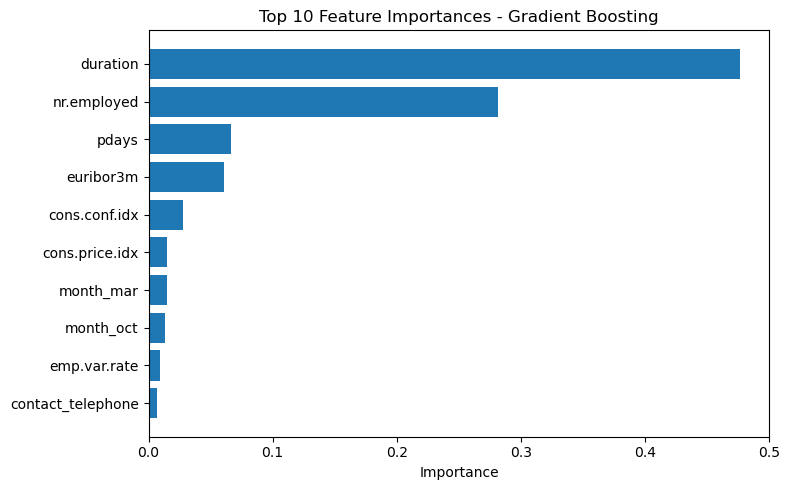

In [12]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)[-10:]  # Top 10 features
    
    plt.figure(figsize=(8, 5))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title(f"Top 10 Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest")
plot_feature_importance(gb, "Gradient Boosting")
